# Part I - Steam Games from 2013 to 2023 success exploration
## by Hessa

## Introduction
The dataset compile the information of the releases that occurred between 2013 and 2023 of the most successful platform for selling video games on PC, Steam. With an estimated number of sales, release dates, among other kinds of variables.

I am going to try to find the factors that make a video game successful from a commercial and critical point of view.

## Preliminary Wrangling
The processed data is the work of Kaggle user 'Terenci Claramunt' who was responsible for cleaning and splitting the datasets collected by Steam API and Steam Spy.

> Reference link: https://www.kaggle.com/datasets/terencicp/steam-games-december-2023

First of all, the particularities will be explored, the important variables will be summarized and unified in a single Dataset.

In [39]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Data upload

- games.csv

- t-games-categories.csv

- t-games-tags.csv



In [40]:
# Read CSV files in a DataFrame
df_main_games = pd.read_csv('/content/datafiles/games.csv')
df_categories_games = pd.read_csv('/content/datafiles/t-games-categories.csv')
df_tag_games = pd.read_csv('/content/datafiles/t-games-tags.csv')

### df_main_games

Features

- **name:** Game title.
- **release_date:** Date the game was published.
- **price:**  Price in USD.
- **positive:** Number of positive reviews.
- **negative:** Number of negative reviews.
- **app_id:** Unique ID for games. (KEY)
- **min_owners:** Estimated sales (minimum), from SteamSpy.
- **max_owners:** Estimated sales (maximum), from SteamSpy.
- **hltb_single:** Game duration, hours, from HowLongToBeat.

In [41]:
df_main_games.describe()# Display the summary of the DataFrame

,price,positive,negative,app_id,min_owners,max_owners,hltb_single
count,60952.000000,6.095200e+04,60952.000000,6.095200e+04,6.095200e+04,6.095200e+04,12972.000000
mean,7.819159,1.045975e+03,193.455326,1.165637e+06,5.489319e+04,1.353160e+05,7.633595
std,9.756732,1.498527e+04,4408.960253,5.986746e+05,6.753193e+05,1.451847e+06,11.943980
min,0.000000,0.000000e+00,0.000000,5.700000e+02,0.000000e+00,2.000000e+04,1.000000
25%,1.990000,4.000000e+00,1.000000,6.760850e+05,0.000000e+00,2.000000e+04,1.000000
50%,4.990000,1.600000e+01,4.000000,1.095830e+06,0.000000e+00,2.000000e+04,3.000000
75%,9.990000,8.000000e+01,24.000000,1.579002e+06,2.000000e+04,5.000000e+04,8.000000
max,299.900000,1.477153e+06,895978.000000,2.690780e+06,1.000000e+08,2.000000e+08,100.000000


In [42]:
df_main_games.head(10)# Display the first 10 rows of the DataFrame

,name,release_date,price,positive,negative,app_id,min_owners,max_owners,hltb_single
0,Train Bandit,"Oct 12, 2017",0.99,53,5,655370,0,20000,NaN
1,Henosis™,"Jul 23, 2020",5.99,3,0,1355720,0,20000,NaN
2,Two Weeks in Painland,"Feb 3, 2020",0.00,50,8,1139950,0,20000,NaN
3,Wartune Reborn,"Feb 26, 2021",0.00,87,49,1469160,50000,100000,NaN
4,TD Worlds,"Jan 9, 2022",10.99,21,7,1659180,0,20000,NaN
5,MazM: Jekyll and Hyde,"Apr 2, 2020",14.99,76,6,1178150,0,20000,7.0
6,Deadlings: Rotten Edition,"Nov 11, 2014",3.99,225,45,320150,50000,100000,4.0
7,WARSAW,"Oct 2, 2019",23.99,589,212,1026420,20000,50000,5.0
8,Cthulhu Realms,"Jul 1, 2016",0.00,147,58,485000,50000,100000,3.0
9,Clockwork Dungeon,"Aug 27, 2021",1.99,5,0,1620060,0,20000,NaN


### df_categories_games

Features

- **app_id:** Unique ID for games.
- **categories:** Game features.

In [43]:
df_categories_games.describe()

,app_id
count,2.105200e+05
mean,1.055516e+06
std,5.879844e+05
min,5.700000e+02
25%,5.616100e+05
50%,9.577150e+05
75%,1.453205e+06
max,2.690780e+06


In [44]:
df_categories_games.head(10)

,app_id,categories
0,655370,Single-player
1,655370,Steam Achievements
2,655370,Full controller support
3,655370,Steam Leaderboards
4,655370,Remote Play on Phone
5,655370,Remote Play on Tablet
6,655370,Remote Play on TV
7,1355720,Single-player
8,1355720,Full controller support
9,1139950,Single-player


### df_tag_games

Features

- **app_id:** Unique ID for games.
- **tags:** User defined tags. (KEY)
- **tag_frequencies:** Number of user votes for a tag in a game.

In [45]:
df_tag_games.describe()

,app_id,tag_frequencies
count,7.774010e+05,777401.000000
mean,1.289685e+06,118.540383
std,6.125159e+05,350.977533
min,5.700000e+02,1.000000
25%,7.858500e+05,24.000000
50%,1.303950e+06,64.000000
75%,1.727520e+06,153.000000
max,2.690780e+06,62902.000000


In [46]:
df_tag_games.head(10)

,app_id,tags,tag_frequencies
0,655370,Indie,109
1,655370,Action,103
2,655370,Pixel Graphics,100
3,655370,2D,97
4,655370,Retro,93
5,655370,Arcade,86
6,655370,Score Attack,84
7,655370,Minimalist,82
8,655370,Comedy,76
9,655370,Singleplayer,69


## Unify

We unify the data into one

In [47]:
# Merge df_main_games-df_categories_games
df_merged_c = pd.merge(df_main_games, df_categories_games, on='app_id', how='left')
grouped_data_c = df_merged_c.groupby('app_id')['categories'].apply(list).reset_index()
# Merge df_main_games-df_tag_games
df_merged_t = pd.merge(df_main_games, df_tag_games, on='app_id', how='left')
grouped_data_t = df_merged_t.groupby('app_id')['tags'].apply(list).reset_index()
# Final Merge
df_main_games = pd.merge(df_main_games, grouped_data_c, on='app_id')
df = pd.merge(df_main_games, grouped_data_t, on='app_id')
df

,name,release_date,price,positive,negative,app_id,min_owners,max_owners,hltb_single,categories,tags
0,Train Bandit,"Oct 12, 2017",0.99,53,5,655370,0,20000,NaN,"[Single-player, Steam Achievements, Full contr...","[Indie, Action, Pixel Graphics, 2D, Retro, Arc..."
1,Henosis™,"Jul 23, 2020",5.99,3,0,1355720,0,20000,NaN,"[Single-player, Full controller support]","[2D Platformer, Atmospheric, Surreal, Mystery,..."
2,Two Weeks in Painland,"Feb 3, 2020",0.00,50,8,1139950,0,20000,NaN,"[Single-player, Steam Achievements]","[Indie, Adventure, Nudity, Violent, Sexual Con..."
3,Wartune Reborn,"Feb 26, 2021",0.00,87,49,1469160,50000,100000,NaN,"[Single-player, Multi-player, MMO, PvP, Online...","[Turn-Based Combat, Massively Multiplayer, Mul..."
4,TD Worlds,"Jan 9, 2022",10.99,21,7,1659180,0,20000,NaN,"[Single-player, Steam Achievements, Steam Cloud]","[Tower Defense, Rogue-lite, RTS, Replay Value,..."
...,...,...,...,...,...,...,...,...,...,...,...
60947,Two Cubes,"Aug 14, 2023",0.99,54,0,2511290,0,20000,NaN,"[Multi-player, Co-op, Online Co-op, Steam Achi...","[Online Co-Op, Adventure, 2D Platformer, Puzzl..."
60948,Wisp Child,"Oct 20, 2023",14.99,5,0,2424000,0,20000,NaN,"[Single-player, Full controller support]","[Action, Adventure, Action-Adventure, Puzzle, ..."
60949,FireKrackers,"Sep 17, 2023",4.99,1,0,2237270,0,20000,NaN,"[Single-player, Tracked Controller Support, VR...","[VR, Arcade, Puzzle-Platformer, Action, Destru..."
60950,nekowater,"Nov 21, 2023",2.99,2,1,2650840,0,20000,NaN,"[Single-player, Steam Achievements, Remote Pla...","[Adventure, Cats, Cute, First-Person, Explorat..."


In [48]:
# DataFrame Save
df.to_csv('games_cleaned.csv')

### What is the structure of your dataset?

The dataset contains 60,952 rows and 11 columns. The columns are as follows:

name (object): Name of the game

release_date (object): Release date of the game

price (float): Price of the game

positive (int): Number of positive reviews

negative (int): Number of negative reviews

app_id (int): Unique identifier for the game

min_owners (int): Minimum number of owners

max_owners (int): Maximum number of owners

hltb_single (float): How long to beat the game in single-player mode

categories (object): Categories of the game

tags (object): Tags associated with the game

### What is/are the main feature(s) of interest in your dataset?

The main features of interest in the dataset are the price, positive and negative reviews, and the number of owners (min_owners and max_owners). These features provide insights into the popularity, reception, and economic aspects of the games.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Release Date: This will help analyze trends over time.

Categories and Tags: These can help segment the data to see how different types of games perform.

Price: Analyzing the relationship between price and reviews/ownership can provide insights into pricing strategies.

Review Counts (Positive and Negative): These will help assess the overall reception and satisfaction of the games.

Ownership Numbers (Min and Max Owners): These are crucial for understanding the market reach and popularity of the games.

## Univariate Exploration

Function to display the distribution of a variable in the dataset.

The most relevant is to visualize the price, release date and duration columns. Their independent properties are interesting to evaluate.

In [49]:
def chart_univariate(column_name:str,n:int,tag=''):
    # Set up the plot
    plt.figure(figsize=(10, 6))
    sb.histplot(df[column_name], bins=n, kde=True)

    # Add labels and title
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'Distribution of Game {tag}')


In [50]:
df.describe()

,price,positive,negative,app_id,min_owners,max_owners,hltb_single
count,60952.000000,6.095200e+04,60952.000000,6.095200e+04,6.095200e+04,6.095200e+04,12972.000000
mean,7.819159,1.045975e+03,193.455326,1.165637e+06,5.489319e+04,1.353160e+05,7.633595
std,9.756732,1.498527e+04,4408.960253,5.986746e+05,6.753193e+05,1.451847e+06,11.943980
min,0.000000,0.000000e+00,0.000000,5.700000e+02,0.000000e+00,2.000000e+04,1.000000
25%,1.990000,4.000000e+00,1.000000,6.760850e+05,0.000000e+00,2.000000e+04,1.000000
50%,4.990000,1.600000e+01,4.000000,1.095830e+06,0.000000e+00,2.000000e+04,3.000000
75%,9.990000,8.000000e+01,24.000000,1.579002e+06,2.000000e+04,5.000000e+04,8.000000
max,299.900000,1.477153e+06,895978.000000,2.690780e+06,1.000000e+08,2.000000e+08,100.000000


**Question:** What is the distribution of game prices?

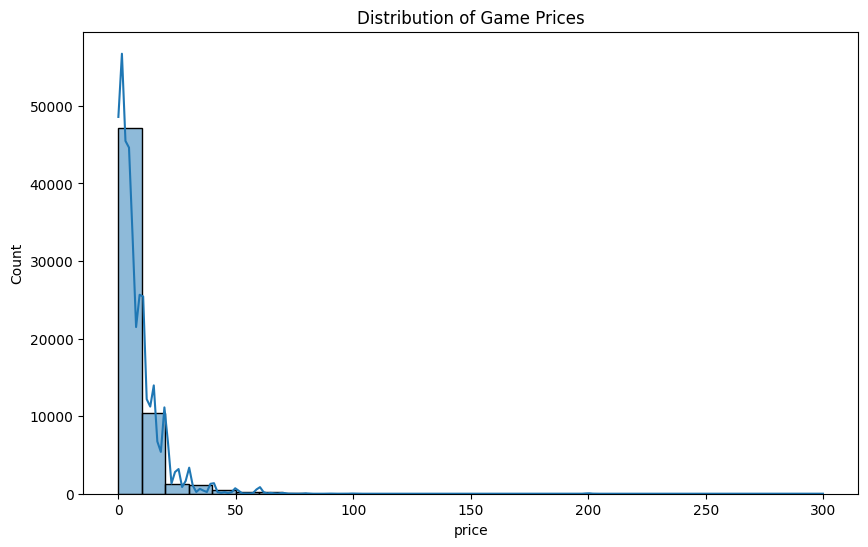

In [51]:
chart_univariate('price',30,'Prices')

**Observations:**

- The mean price is 7.82 with a standard deviation of 9.76.This indicates a wide variety of pricing strategies, with some games being priced significantly higher than others.

- The price ranges from 0 to 299.90. The distribution shows a concentration of lower-priced games

- The 25th percentile (Q1) is 1.99, the median (Q2) is 4.99, and the 75th percentile (Q3) is 9.99.

- Prices above 24.98 or below -13.00 can be considered outliers based on the IQR method (Q1 - 1.5 * IQR and Q3 + 1.5 * IQR).



**Question:** How are the release dates of the games distributed?

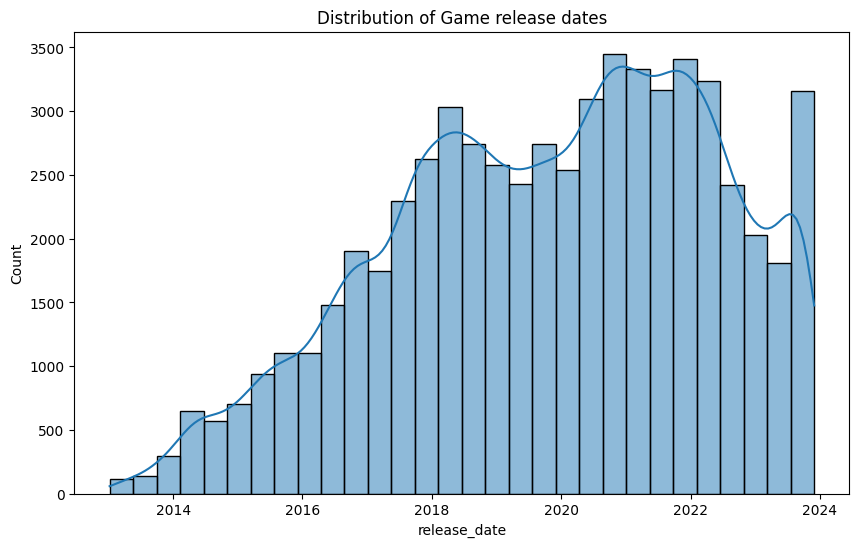

In [52]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce').dropna()
chart_univariate('release_date',30,'release dates')

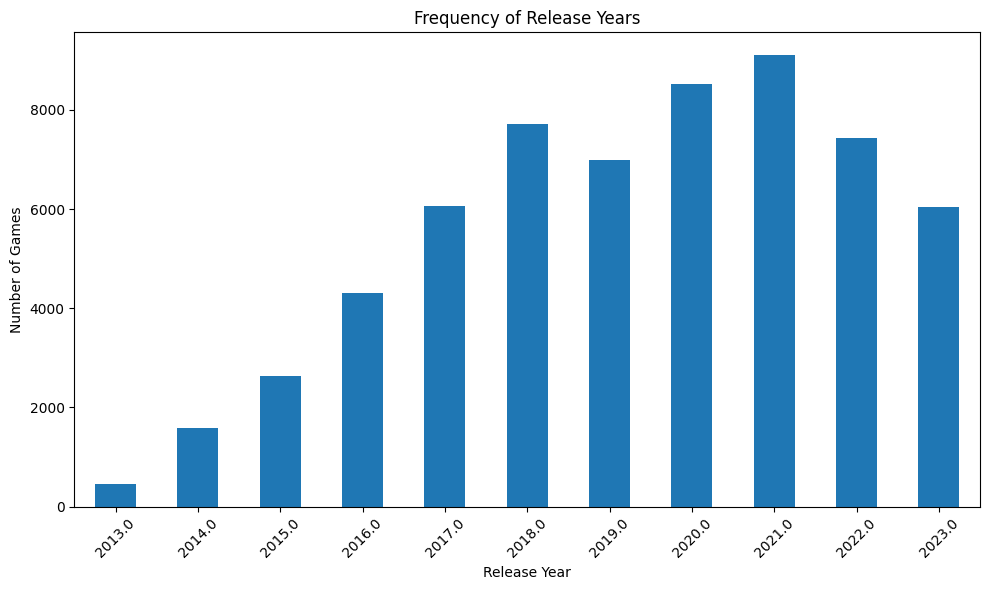

In [53]:
# Extract the year from the release date
df['release_year'] = df['release_date'].dt.year

# Count the frequency of each release year
year_counts = df['release_year'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.xlabel('Release Year')
plt.ylabel('Number of Games')
plt.title('Frequency of Release Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations:**

- There is a noticeable upward trend in the number of game releases from 2012 to 2018. This period marks a significant growth in the number of games being released each year.

- After 2018, there is a slight decline in the trend and then fluctuations in the number of releases. However, the overall count remains relatively high.

- There is a resurgence in game releases post-2020 (COVID), with a high number of releases continuing into 2021 and 2022.

- The distribution shows that the industry has become more prolific over time, with more games being developed and released each year.

**Question:** What is the distribution of the average length of the games (to complete)?

There are video games that do not have a declared ending, let's find out how they are contemplated in the dataset.

In [54]:
df.loc[df['hltb_single'].isna()]
print(len(df.loc[df['hltb_single'].isna()]), 'endless games')

47980 endless games


there are 47980 infinite games, which means that only about 20% of the games on the list have endings.

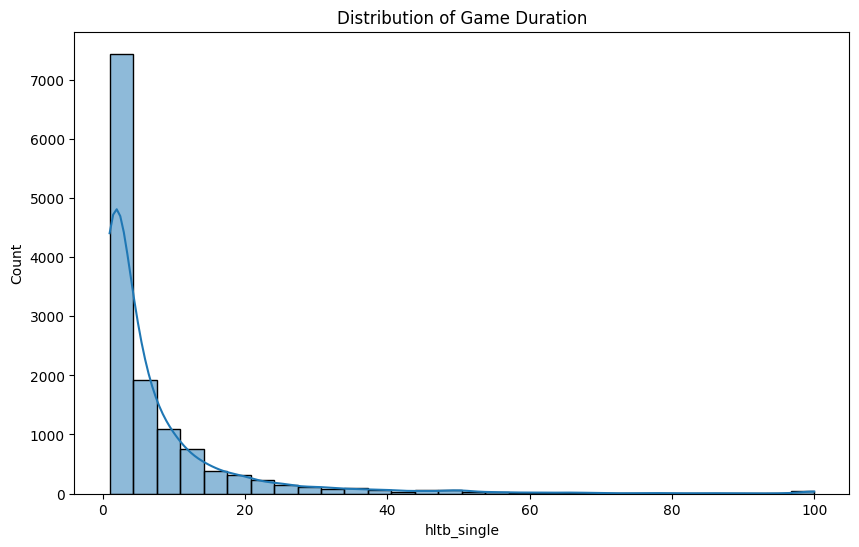

In [55]:
chart_univariate('hltb_single',30,'Duration')

**Observations:**

- The playtime for single-player games ranges from 1 to 100 hours. The median playtime is 3 hours, with the 75th percentile at 8 hours. This suggests that most single-player games can be completed relatively quickly, with a few outliers requiring significantly more time.

- The average playtime is 7.63 hours, with a standard deviation of 11.94 hours. This indicates that while most games have moderate playtimes, there are some games that are significantly longer.


In [56]:
# Create the new column based on the average
df['avg_owners'] = df[['min_owners', 'max_owners']].mean(axis=1)

# Modify the new column based on the conditions
df['avg_owners'] = df['avg_owners'].replace(10000, 100) #We define 100 to try to be fairer to those who abound but do not sell with the others who have modest sales.

df

,name,release_date,price,positive,negative,app_id,min_owners,max_owners,hltb_single,categories,tags,release_year,avg_owners
0,Train Bandit,2017-10-12,0.99,53,5,655370,0,20000,NaN,"[Single-player, Steam Achievements, Full contr...","[Indie, Action, Pixel Graphics, 2D, Retro, Arc...",2017.0,100.0
1,Henosis™,2020-07-23,5.99,3,0,1355720,0,20000,NaN,"[Single-player, Full controller support]","[2D Platformer, Atmospheric, Surreal, Mystery,...",2020.0,100.0
2,Two Weeks in Painland,2020-02-03,0.00,50,8,1139950,0,20000,NaN,"[Single-player, Steam Achievements]","[Indie, Adventure, Nudity, Violent, Sexual Con...",2020.0,100.0
3,Wartune Reborn,2021-02-26,0.00,87,49,1469160,50000,100000,NaN,"[Single-player, Multi-player, MMO, PvP, Online...","[Turn-Based Combat, Massively Multiplayer, Mul...",2021.0,75000.0
4,TD Worlds,2022-01-09,10.99,21,7,1659180,0,20000,NaN,"[Single-player, Steam Achievements, Steam Cloud]","[Tower Defense, Rogue-lite, RTS, Replay Value,...",2022.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60947,Two Cubes,2023-08-14,0.99,54,0,2511290,0,20000,NaN,"[Multi-player, Co-op, Online Co-op, Steam Achi...","[Online Co-Op, Adventure, 2D Platformer, Puzzl...",2023.0,100.0
60948,Wisp Child,2023-10-20,14.99,5,0,2424000,0,20000,NaN,"[Single-player, Full controller support]","[Action, Adventure, Action-Adventure, Puzzle, ...",2023.0,100.0
60949,FireKrackers,2023-09-17,4.99,1,0,2237270,0,20000,NaN,"[Single-player, Tracked Controller Support, VR...","[VR, Arcade, Puzzle-Platformer, Action, Destru...",2023.0,100.0
60950,nekowater,2023-11-21,2.99,2,1,2650840,0,20000,NaN,"[Single-player, Steam Achievements, Remote Pla...","[Adventure, Cats, Cute, First-Person, Explorat...",2023.0,100.0


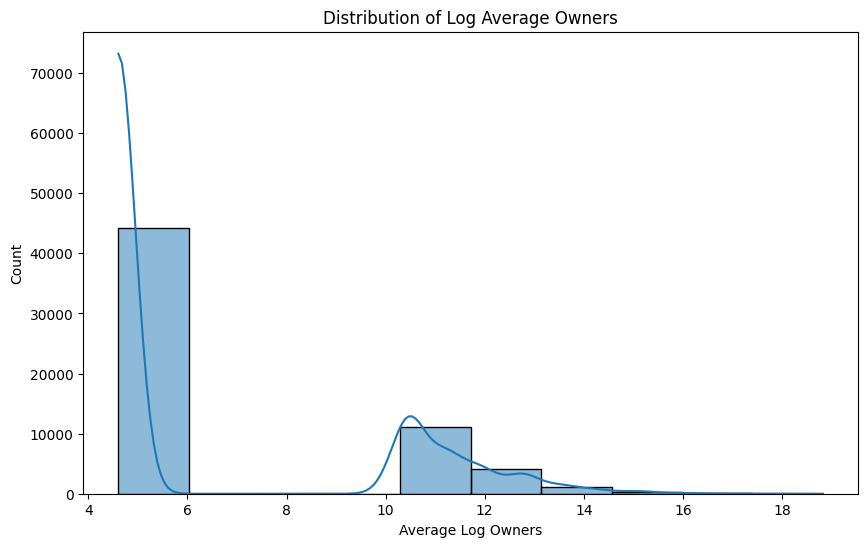

In [57]:
# Plotting the avg_owners column
plt.figure(figsize=(10, 6))
sb.histplot(np.log(df['avg_owners']), bins=10, kde=True)

# Add labels and title
plt.xlabel('Average Log Owners')
plt.ylabel('Count')
plt.title('Distribution of Log Average Owners')
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

It is not surprising the gigantic gap between the economic or directly free games versus the games above 30 dollars, one of the revolutions that brought the easy access to distribution of games on PC on Steam was to open the doors to indie development which in turn by quantity and production values would result in a greater number of cheaper games.

At the same time it is interesting to know that this huge amount of free games is not because they are non-commercial works, but because they monetize their product by other means, usually with in-game microtransactions.

It is interesting to see that in 2022 the publication of games had a slight decline due to the immediate problems to COVID, then in a very short time recovered the trend, to suffer again the post-COVID crisis that reaches our days.

To work with the min_owners and max_owners variables, it will be interesting to make a bivariate exploration, this also applies to the positive and negative reviews.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There were no major transformations outside of a convenient adjustment using datetime in order to display the release date plot.

The most controversial criterion is the duration of the games, since only 12972 out of 60952 games have a true duration. And I didn't decide to clean the NaN because those kind of games are important and their characteristics can be extracted from other places, specifically in the tags and categories column.

Exploring this data there is no doubt that the most effective section will be the multivariate exploration.

## Bivariate Exploration


### **min_owners** vs. **max_owners**:

Evaluating only one of the two variables is very incomplete, as the ranges are too wide for games with less attention. There are games that haven't sold zero copies but are certainly nowhere near 20,000.

Step 1: Plotting the Data

We'll use a scatter plot with both axes in logarithmic scale to handle the wide range of values effectively.

Step 2: Adjusting the Data

Given the wide range of values, we should use a variable that is adapted to be deterministic with the number of sales or acquisitions to better visualize the distribution and the relationship between min_owners and max_owners.




#### Original

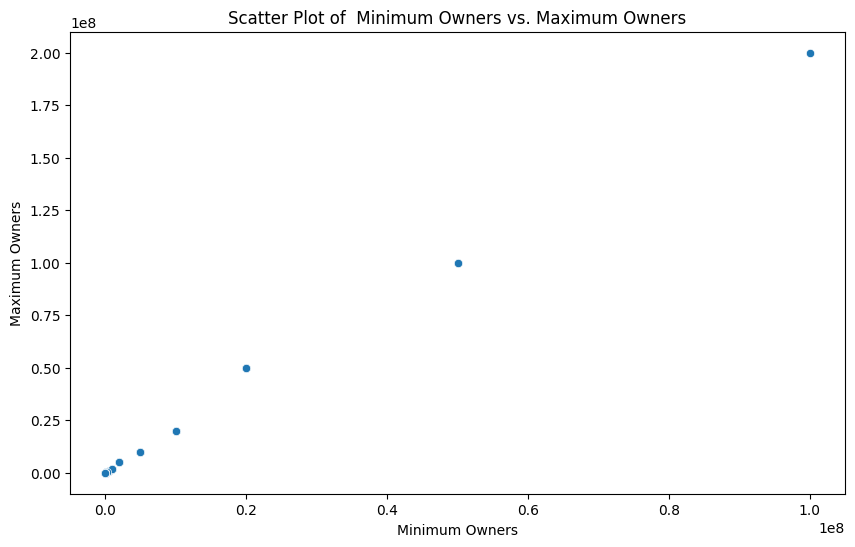

In [58]:
# Set up the plot
plt.figure(figsize=(10, 6))
sb.scatterplot(data=df, x="min_owners", y="max_owners")

# Add labels and title
plt.xlabel('Minimum Owners')
plt.ylabel('Maximum Owners')
plt.title('Scatter Plot of  Minimum Owners vs. Maximum Owners')

plt.show()

#### Logarithm

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


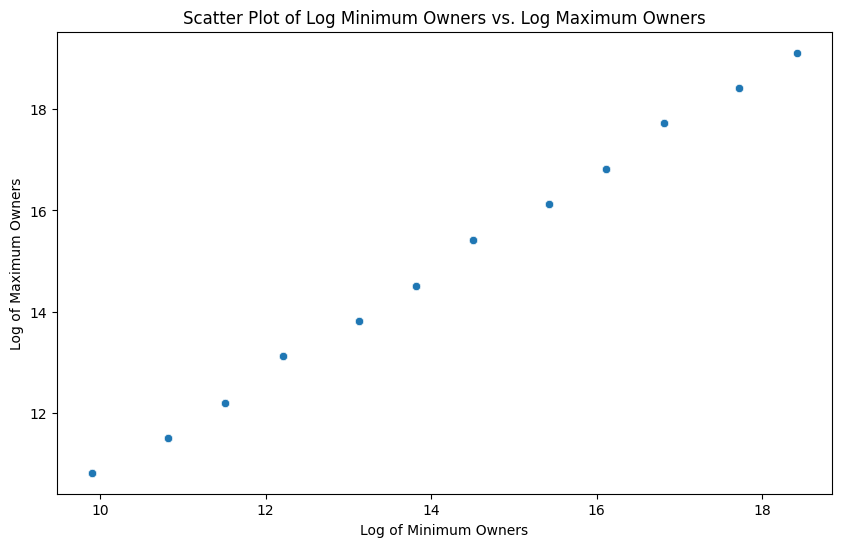

In [59]:
# Apply logarithm to 'min_owners' and 'max_owners' for plotting
df['log_min_owners'] = np.log(df['min_owners'])
df['log_max_owners'] = np.log(df['max_owners'])

# Set up the plot
plt.figure(figsize=(10, 6))
sb.scatterplot(data=df, x="log_min_owners", y="log_max_owners")

# Add labels and title
plt.xlabel('Log of Minimum Owners')
plt.ylabel('Log of Maximum Owners')
plt.title('Scatter Plot of Log Minimum Owners vs. Log Maximum Owners')

plt.show()

Correlation: There is a positive correlation between min_owners and max_owners. Games with higher minimum ownership generally also have higher maximum ownership.

Cluster of Low-Owner Games: A significant cluster of points lies in the lower range, suggesting many games have relatively low ownership. This is likely due to the minimum ownership values of 20,000 affecting many games.


Outliers: There are outliers with extremely high ownership, indicating some games are exceptionally popular.

In [60]:
df.sort_values(by=['max_owners']).head()


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,name,release_date,price,positive,negative,app_id,min_owners,max_owners,hltb_single,categories,tags,release_year,avg_owners,log_min_owners,log_max_owners
0,Train Bandit,2017-10-12,0.99,53,5,655370,0,20000,NaN,"[Single-player, Steam Achievements, Full contr...","[Indie, Action, Pixel Graphics, 2D, Retro, Arc...",2017.0,100.0,-inf,9.903488
38199,Tyr: Chains of Valhalla,2018-05-08,10.99,19,11,609720,0,20000,1.0,"[Single-player, Steam Achievements, Full contr...","[Action, Adventure, Indie, Platformer, 2D, Ani...",2018.0,100.0,-inf,9.903488
38200,Hard Way To Heaven,2018-04-20,5.99,2,0,836120,0,20000,NaN,"[Single-player, Multi-player, Co-op, Shared/Sp...",[Indie],2018.0,100.0,-inf,9.903488
38201,Deadlokk,2021-08-17,11.99,0,6,1592950,0,20000,NaN,"[Single-player, Multi-player, PvP, Online PvP,...","[Early Access, Top-Down Shooter, Physics, MOBA...",2021.0,100.0,-inf,9.903488
38202,Color by Number - Medieval Portrait,2021-08-03,1.99,1,0,1697470,0,20000,NaN,[Single-player],"[Action, Adventure, Casual, RPG, Simulation, S...",2021.0,100.0,-inf,9.903488


In [61]:
df.sort_values(by=['max_owners']).tail()

,name,release_date,price,positive,negative,app_id,min_owners,max_owners,hltb_single,categories,tags,release_year,avg_owners,log_min_owners,log_max_owners
50144,Path of Exile,2013-10-23,0.00,167454,16653,238960,20000000,50000000,25.0,"[Single-player, Multi-player, MMO, PvP, Online...","[Free to Play, Action RPG, Hack and Slash, RPG...",2013.0,35000000.0,16.811243,17.727534
43855,Halo Infinite,2021-11-15,0.00,106133,38163,1240440,20000000,50000000,11.0,"[Multi-player, PvP, Online PvP, LAN PvP, Cross...","[Free to Play, FPS, Multiplayer, Action, Shoot...",2021.0,35000000.0,16.811243,17.727534
7419,PUBG: BATTLEGROUNDS,2017-12-21,0.00,1154655,895978,578080,50000000,100000000,NaN,"[Multi-player, PvP, Online PvP, Stats, Remote ...","[Survival, Shooter, Multiplayer, Battle Royale...",2017.0,75000000.0,17.727534,18.420681
5871,New World,2021-09-28,39.99,154914,73900,1063730,50000000,100000000,NaN,"[Multi-player, MMO, PvP, Online PvP, Co-op, On...","[Massively Multiplayer, Open World, MMORPG, RP...",2021.0,75000000.0,17.727534,18.420681
14576,Dota 2,2013-07-09,0.00,1477153,300437,570,100000000,200000000,NaN,"[Multi-player, Co-op, Steam Trading Cards, Ste...","[Free to Play, MOBA, Multiplayer, Strategy, e-...",2013.0,150000000.0,18.420681,19.113828


Original: The value 1 is equal to 100000000 of acquisitions.

Even applying logarithmic scale it is difficult to perceive the least purchased sets, which in turn result in the highest quantity.

Using this graph we can have a more or less accurate intuition to be more deterministic and unify in a single variable.

### Ratio of **positive** to **negative**

Step 1: Calculating the Ratio
We'll create a new column in the DataFrame to store the ratio of positive to negative reviews. To avoid division by zero, we can add a small constant to the denominator.

Step 2: Plotting the Ratio
We'll use a histogram to visualize the distribution of this ratio.

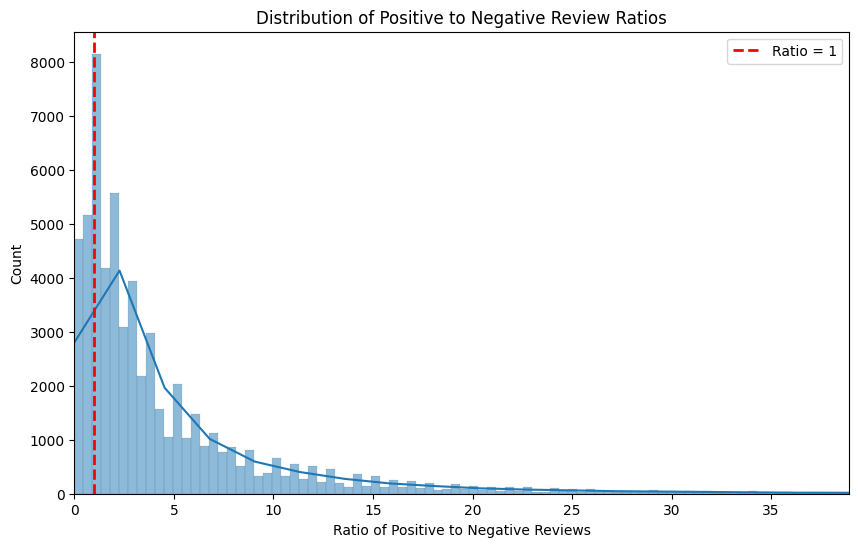

In [62]:
# Calculate the ratio of positive to negative reviews
df['review_ratio'] = df['positive'] / (df['negative'] + 1)

# Set up the plot
plt.figure(figsize=(10, 6))
sb.histplot(df['review_ratio'], bins=1000, kde=True)

# Add labels and title
plt.xlabel('Ratio of Positive to Negative Reviews')
plt.ylabel('Count')
plt.title('Distribution of Positive to Negative Review Ratios')

plt.xlim(0, df['review_ratio'].quantile(0.99))  # Limiting x-axis to 99th percentile to handle outliers

# Add a vertical line at x=1
plt.axvline(x=1, color='r', linestyle='--', linewidth=2, label='Ratio = 1')
plt.legend()


plt.show()

### **Box Plot of Game Prices**

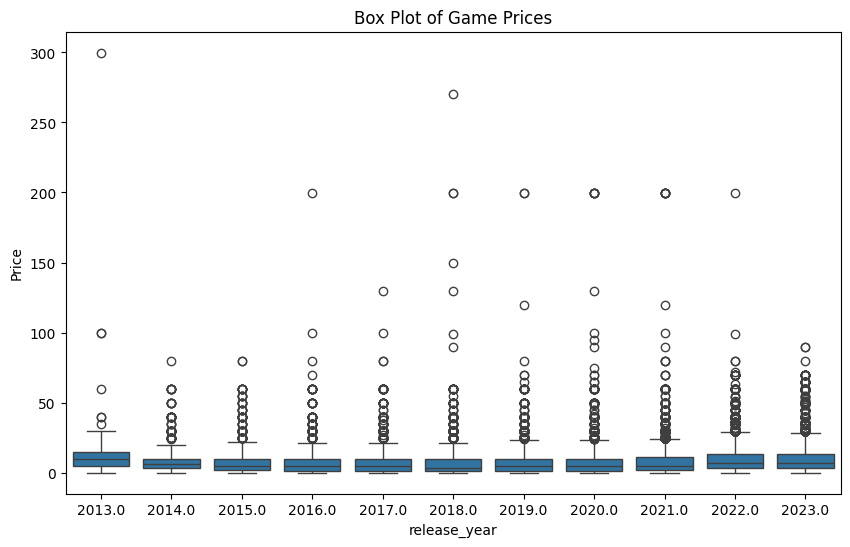

In [63]:
# Extract the year from the release date
df['release_year'] = df['release_date'].dt.year

# Set up the plot
plt.figure(figsize=(10, 6))

# Create the box plot
sb.boxplot(x=df['release_year'],y=df['price'])

# Add labels and title
plt.ylabel('Price')
plt.title('Box Plot of Game Prices')

plt.show()

**Observations:**

Price Range: The majority of game prices are concentrated at the lower end of the scale, as indicated by the narrow interquartile range (IQR).

Outliers: There are numerous outliers extending well beyond the upper whisker. Some game prices reach as high as $300, which is significantly above the typical range.

Median Price: The median price appears to be very low, suggesting that most games are priced affordably.

Skewness: The data is heavily skewed to the right, with a long tail of higher-priced games.

This distribution highlights that while most games are priced modestly, there is a notable presence of high-priced games that drive up the overall price range.

### **Heatmap of Game Prices and sales**


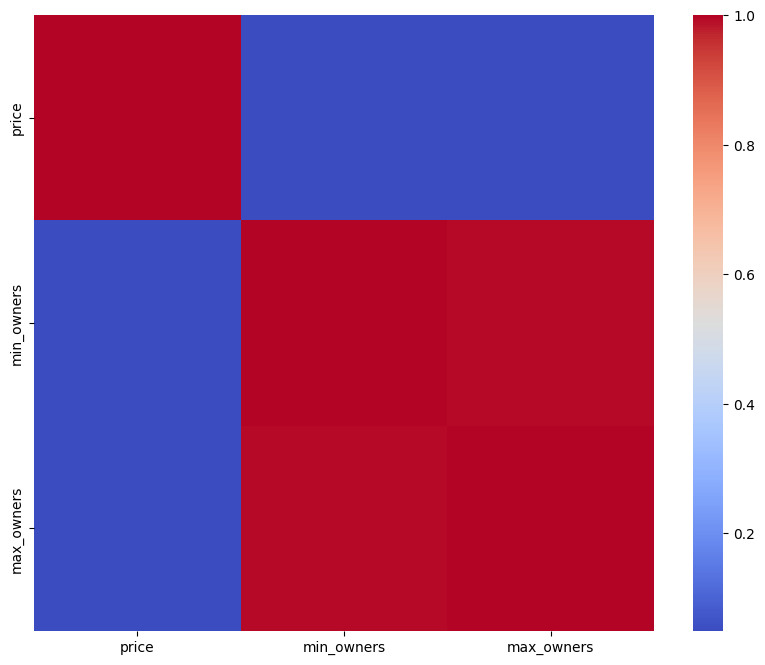

In [64]:
# Calculate the correlation matrix
correlation_matrix = df[['price','min_owners','max_owners']].corr()

# Create the heatmap
plt.figure(figsize = (10,8))
sb.heatmap(correlation_matrix, cmap = 'coolwarm')
plt.show()

**Observations:**

It is easy to see how the relationship between 'min_owners' and 'max owners' is straightforward. This implies that the diagnostics they performed are of very superficial ranges, and it is not a meticulous one per game.

**1.  Explore the relationship between sales (using avg_owners as a proxy), critical acclaim (using review_ratio as a proxy), and game length (hltb_single)**

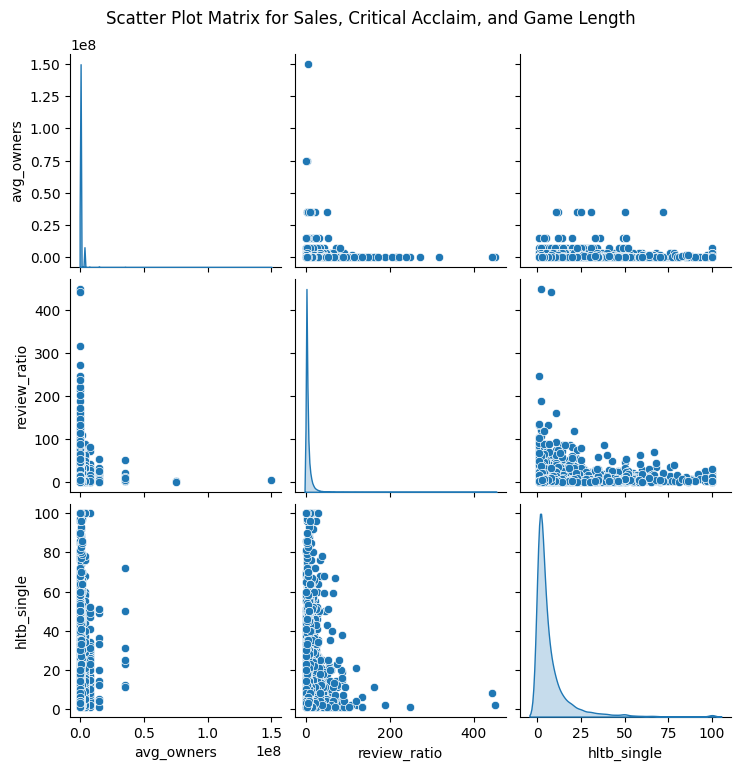

In [65]:
# Select the relevant columns for multivariate analysis
df_multivariate = df[['avg_owners', 'review_ratio', 'hltb_single']]

# Pairplot to see the relationship between avg_owners, review_ratio, and hltb_single
sb.pairplot(df_multivariate, diag_kind='kde')
plt.suptitle('Scatter Plot Matrix for Sales, Critical Acclaim, and Game Length', y=1.02)
plt.show()

**Observations:**

**Sales (avg_owners) vs. Critical Acclaim (review_ratio):**

There is not a positive correlation between the number of owners and the review ratio. Critically acclaimed games tend not to be more popular and therefore reserve a more moderate place in the critics. Contrary to the overflow that can be found with lesser-owned games, which seem to have a more heterogeneous critical distribution.

Outliers exist where games have a high number of owners but a low review ratio, indicating that despite being popular, they might not be critically acclaimed.

**Sales (avg_owners) vs. Game Length (hltb_single):**

The relationship between game length and sales is complex. Some players prefer longer games for their greater value, while others may prefer shorter games for a quicker experience.

We can see that extremely long or short games have different levels of popularity, indicating different player preferences.

So it seems that the result is fairly homogeneous in terms of interest in buying products in their various lengths.

**Critical Acclaim (review_ratio) vs. Game Length (hltb_single):**

The relationship between game length and reviews is complex.

While it can be seen that games with the highest number of positive reviews are in the 3 to 15 minute range, games with the highest number of positive reviews are in the 3 to 15 minute range.

This is to be expected knowing that this section is made up of single-player games and a shorter, juicier experience may be more satisfying for the user.




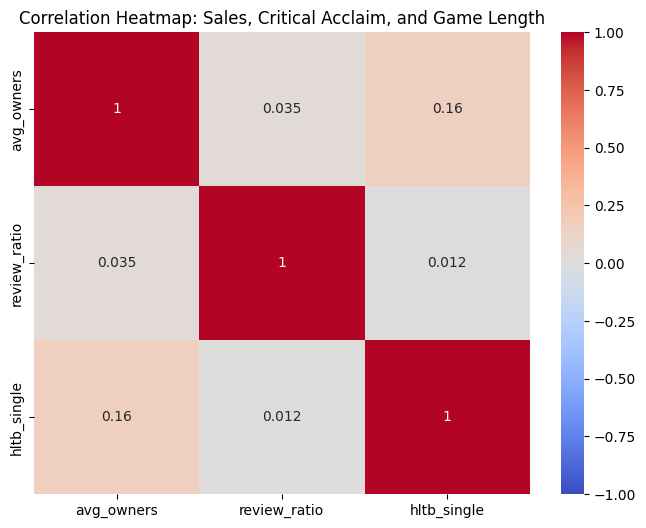

In [66]:
# Calculate the correlation matrix
corr_matrix = df_multivariate.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Sales, Critical Acclaim, and Game Length')
plt.show()


**Observations:**

**Sales and Critical Acclaim:**

Out of logic, there is no strong relationship between sales and prestige. It can be understood that in the most popular games, communities are built more deeply rooted and therefore become constant critics of the work.


**Sales and Game Length:**

The strongest of the relationships. We could be quite sure that the games of less than 20 hours are the ones with the best conversion sale and duration.

**Critical Acclaim and Game Length:**

The least strong relationship. This implies that along with the idea presented in 'Sales and Game Length' that there is a special predisposition of players for games with a duration of less than 20 hours without being very relevant the quality of the game itself.

**2.  Explore the seasonal trends in game releases, particularly focusing on whether there are specific months or quarters with more game releases, and to compare these trends between high-priced and modestly priced game**

In [67]:
df['price'].describe()

count    60952.000000
mean         7.819159
std          9.756732
min          0.000000
25%          1.990000
50%          4.990000
75%          9.990000
max        299.900000
Name: price, dtype: float64

In terms of quantity it is easy to observe a total hegemony of games under $10. In order to enter a middle ground we will use as a threshold the 20 usd to divide the independent industry and the industry of the big productions.

In [68]:
# Extract month and quarter
df['release_month'] = df['release_date'].dt.month
df['release_quarter'] = df['release_date'].dt.quarter

# Classify games as high-priced or modestly priced
price_threshold = 20 # Using the price above 75% of all prices
df['price_category'] = df['price'].apply(lambda x: 'High' if x > price_threshold else 'Modest')

print('Treshold: ',price_threshold)

Treshold:  20


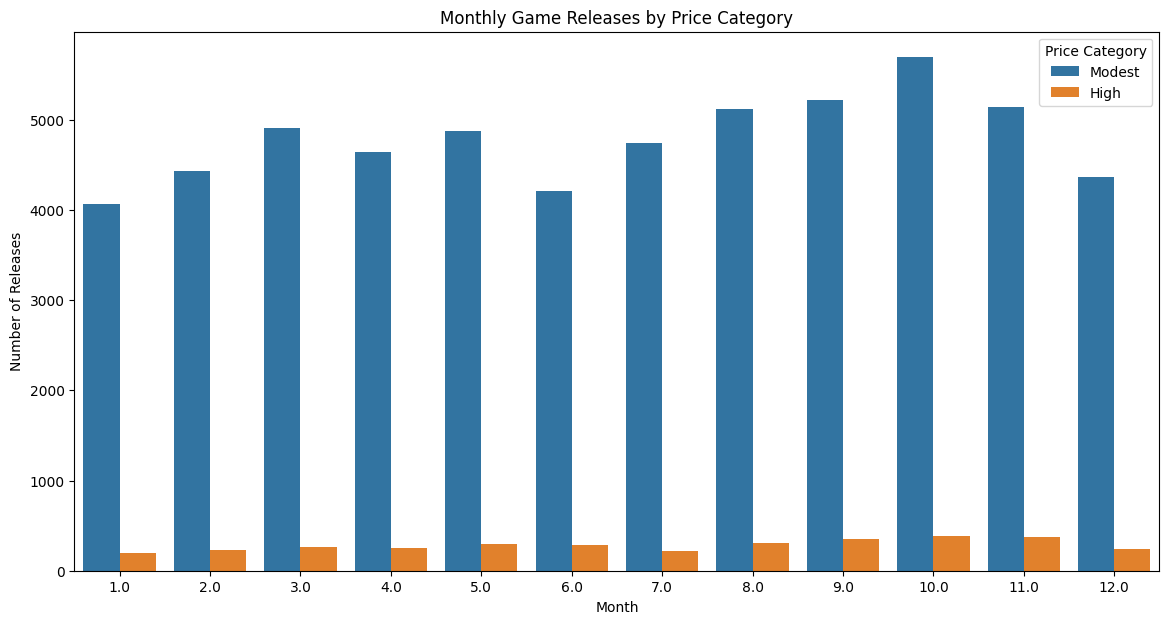

In [69]:
plt.figure(figsize=(14, 7))

# Plotting monthly release trends
sb.countplot(data=df, x='release_month', hue='price_category')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Monthly Game Releases by Price Category')
plt.legend(title='Price Category')
plt.show()

The difference in the scope and quantitative dominance of the independent industry is clear.

Even knowing that these videogames deal with particular market niches, their behavior is very similar in both cases. The middle of the year being scarcer and reaching its peak at the end of the year.

The reality is that throughout the year the launching of videogames is quite homogeneous.

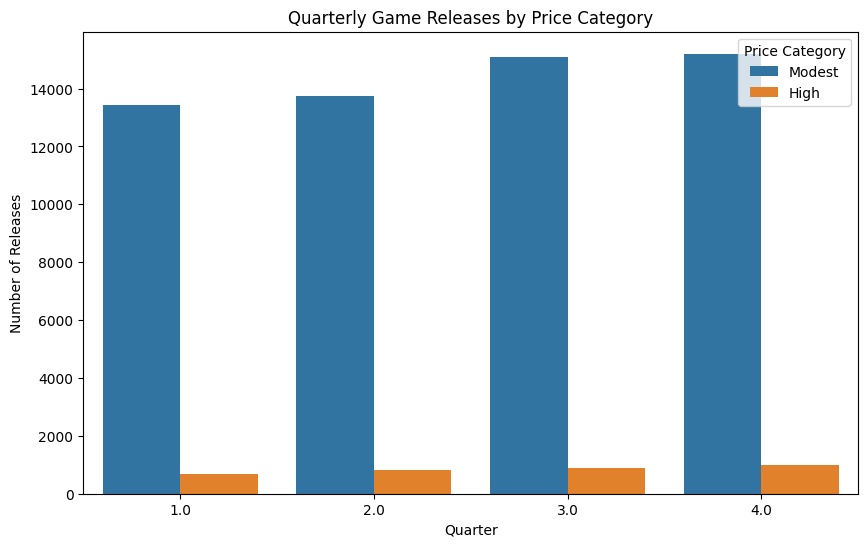

In [70]:
plt.figure(figsize=(10, 6))

# Plotting quarterly release trends
sb.countplot(data=df, x='release_quarter', hue='price_category')
plt.xlabel('Quarter')
plt.ylabel('Number of Releases')
plt.title('Quarterly Game Releases by Price Category')
plt.legend(title='Price Category')
plt.show()

We confirm that the second half of the year is the most competitive.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
This in summary is the great relationship I find strongest.

Compare sales with critical acclaim and game length: Look particularly at the sales performance of the most critically acclaimed games and their length. This can be one of the fundamental keys to understanding how the market functions and whether there really is a close relationship between quality, longevity and number of sales.

*The following is my extended interpretation of the bivariate exploration*

**Relationship Between min_owners and max_owners:**

Logarithmic Relationship: When plotting the logarithm of min_owners against max_owners, it becomes evident that there's a strong positive correlation between the two. This makes sense since games with a higher minimum number of owners also tend to have a higher maximum number of owners.

Wide Range: The values of min_owners and max_owners span several orders of magnitude, highlighting the disparity between less popular and highly popular games.

Clustering: There is a noticeable clustering of games within certain ranges, indicating that many games tend to have a similar range of ownership. For instance, games with min_owners in the lower range (e.g., 5,000 to 20,000) tend to cluster together.

**Relationship Between Ratio of Positive to Negative Reviews:**

Skewed Distribution: The ratio of positive to negative reviews is heavily skewed towards the lower end, with a long tail extending towards higher ratios. This suggests that while many games have a moderate number of positive reviews compared to negative ones, a smaller subset of games receives overwhelmingly positive feedback.

Critical Threshold: The vertical line at a ratio of 1 on the x-axis is crucial. Games with a ratio above 1 have more positive reviews than negative ones, while those below 1 have more negative reviews. Most games fall above this line, indicating generally positive reception.

Outliers: The distribution has a few significant outliers with extremely high positive-to-negative review ratios. These outliers likely represent highly acclaimed games with a substantial number of positive reviews relative to negative ones.

**Observations on Combined Analysis:**

Popularity and Reviews: There seems to be a relationship between the number of owners (both minimum and maximum) and the review ratio. Games with a higher number of owners tend to have higher positive-to-negative review ratios, suggesting that popular games generally receive better reviews.

Review Ratio's Impact: The review ratio can serve as an indicator of a game's success and reception in the market. Games with higher ratios are more likely to attract more players, leading to higher ownership numbers.

In summary, the investigation reveals that games with higher ownership numbers tend to receive better reviews, and the positive-to-negative review ratio is a significant indicator of a game's reception and success.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Here are a number of ideas that I found interesting.

Seasonal trends: It would be interesting to see if there are specific months or quarters within each year where there are more game releases, you could split this between big price and modest prices to understand both sectors of the industry.

Genre analysis: investigate whether particular game genres have contributed more to the increase in game releases over time.


Impact of major events: Further analysis of how major world events (economic crises, pandemics, etc.) have influenced game releases.

## Multivariate Exploration


**1. Scatter Plot: Sales (avg_owners) vs. Review Ratio with Game Length and Min Owners**

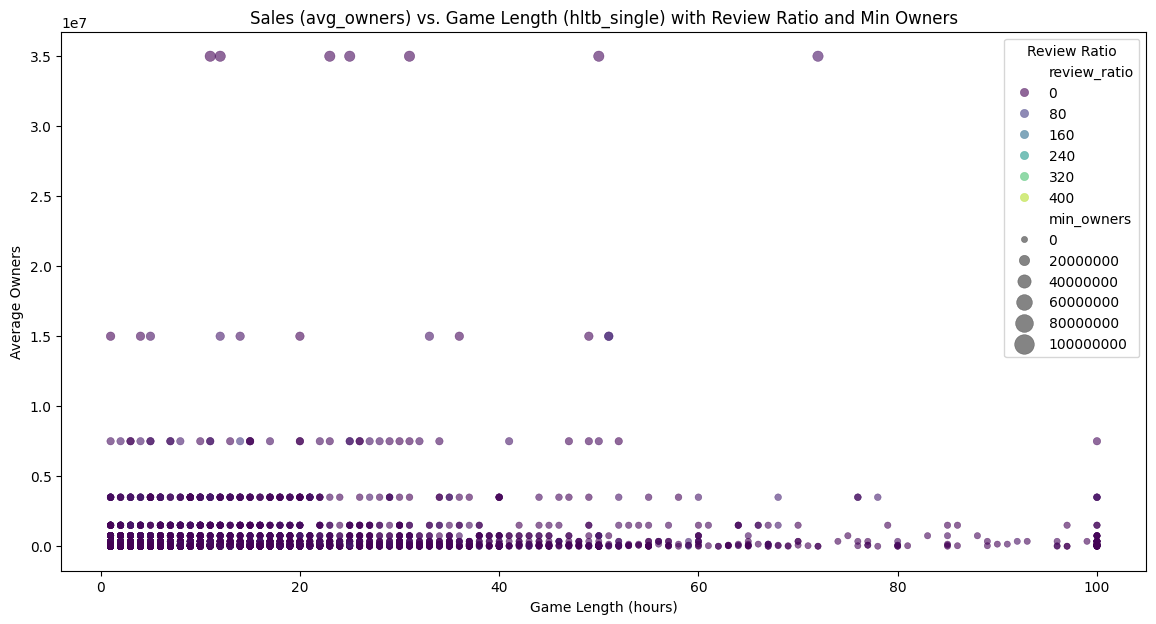

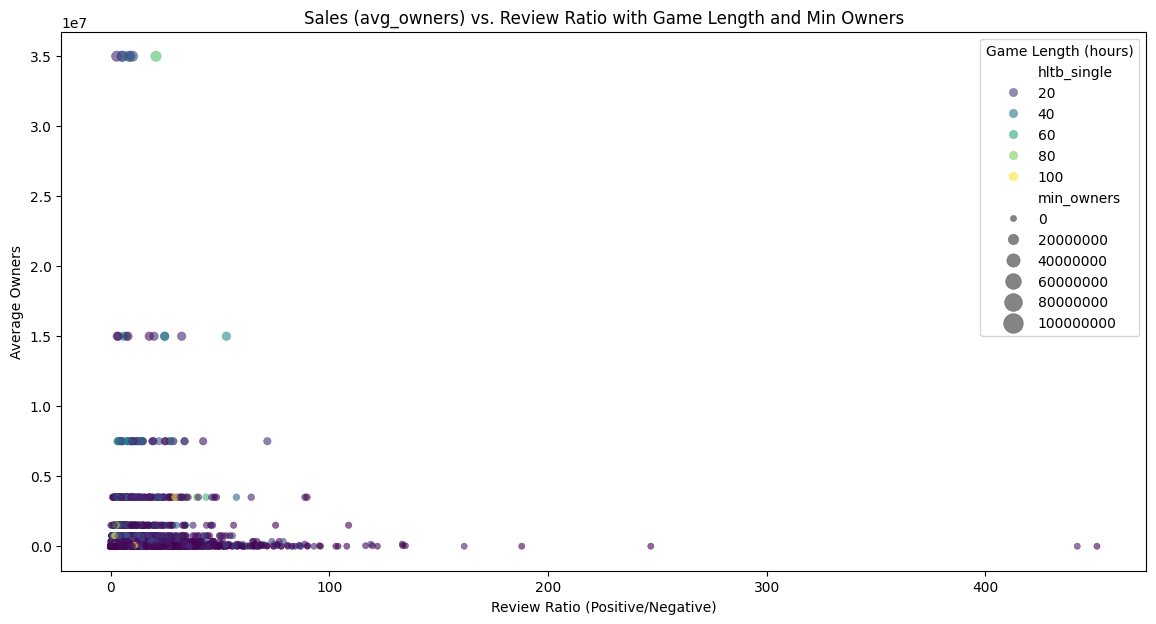

In [71]:
# Create the price category column
df['price_category'] = df['price'].apply(lambda x: 'High' if x >= 20 else 'Modest')

# Create scatter plot for Sales (avg_owners) vs. Game Length (hltb_single) with multiple encodings
plt.figure(figsize=(14, 7))
scatter = sb.scatterplot(data=df, x='hltb_single', y='avg_owners', hue='review_ratio', size='min_owners', sizes=(20, 200), palette='viridis', alpha=0.6, edgecolor=None)

# Add labels and title
plt.xlabel('Game Length (hours)')
plt.ylabel('Average Owners')
plt.title('Sales (avg_owners) vs. Game Length (hltb_single) with Review Ratio and Min Owners')
plt.legend(loc='best', bbox_to_anchor=(1, 1), title='Review Ratio')

# Show the plot
plt.show()

# Create scatter plot for Sales (avg_owners) vs. Review Ratio with multiple encodings
plt.figure(figsize=(14, 7))
scatter = sb.scatterplot(data=df, x='review_ratio', y='avg_owners', hue='hltb_single', size='min_owners', sizes=(20, 200), palette='viridis', alpha=0.6, edgecolor=None)

# Add labels and title
plt.xlabel('Review Ratio (Positive/Negative)')
plt.ylabel('Average Owners')
plt.title('Sales (avg_owners) vs. Review Ratio with Game Length and Min Owners')
plt.legend(loc='best', bbox_to_anchor=(1, 1), title='Game Length (hours)')

# Show the plot
plt.show()

This scatter plot shows the relationship between average owners (sales) and review ratio (positive/negative), while encoding game length (hours) through color and minimum owners through the size of the points.

**Observations:**

**High Sales with Low Review Ratios:** There are outliers where games have a high number of average owners but a low review ratio, indicating popularity despite not being critically acclaimed.

**Color and Size Distribution:** Most data points are clustered at the lower end of the review ratio scale, with varying game lengths and min owners. This suggests that games with shorter playtime and fewer owners generally receive more reviews.

**Homogeneous Clustering:** The dense clustering at the lower end of both review ratio and average owners indicates that many games are moderately popular and have a mixed review profile.

**Outliers:** Some games with extreme review ratios and average owners stand out, showing a wide range of player preferences and game performances.







**2. Analysis of Sales Distribution Between High-Priced and Modestly Priced Games**

In [72]:
# Extract the year from the release date
df['release_year'] = df['release_date'].dt.year

# Aggregate total average owners per year for each price category
annual_sales = df.groupby(['release_year', 'price_category'])['avg_owners'].sum().reset_index()


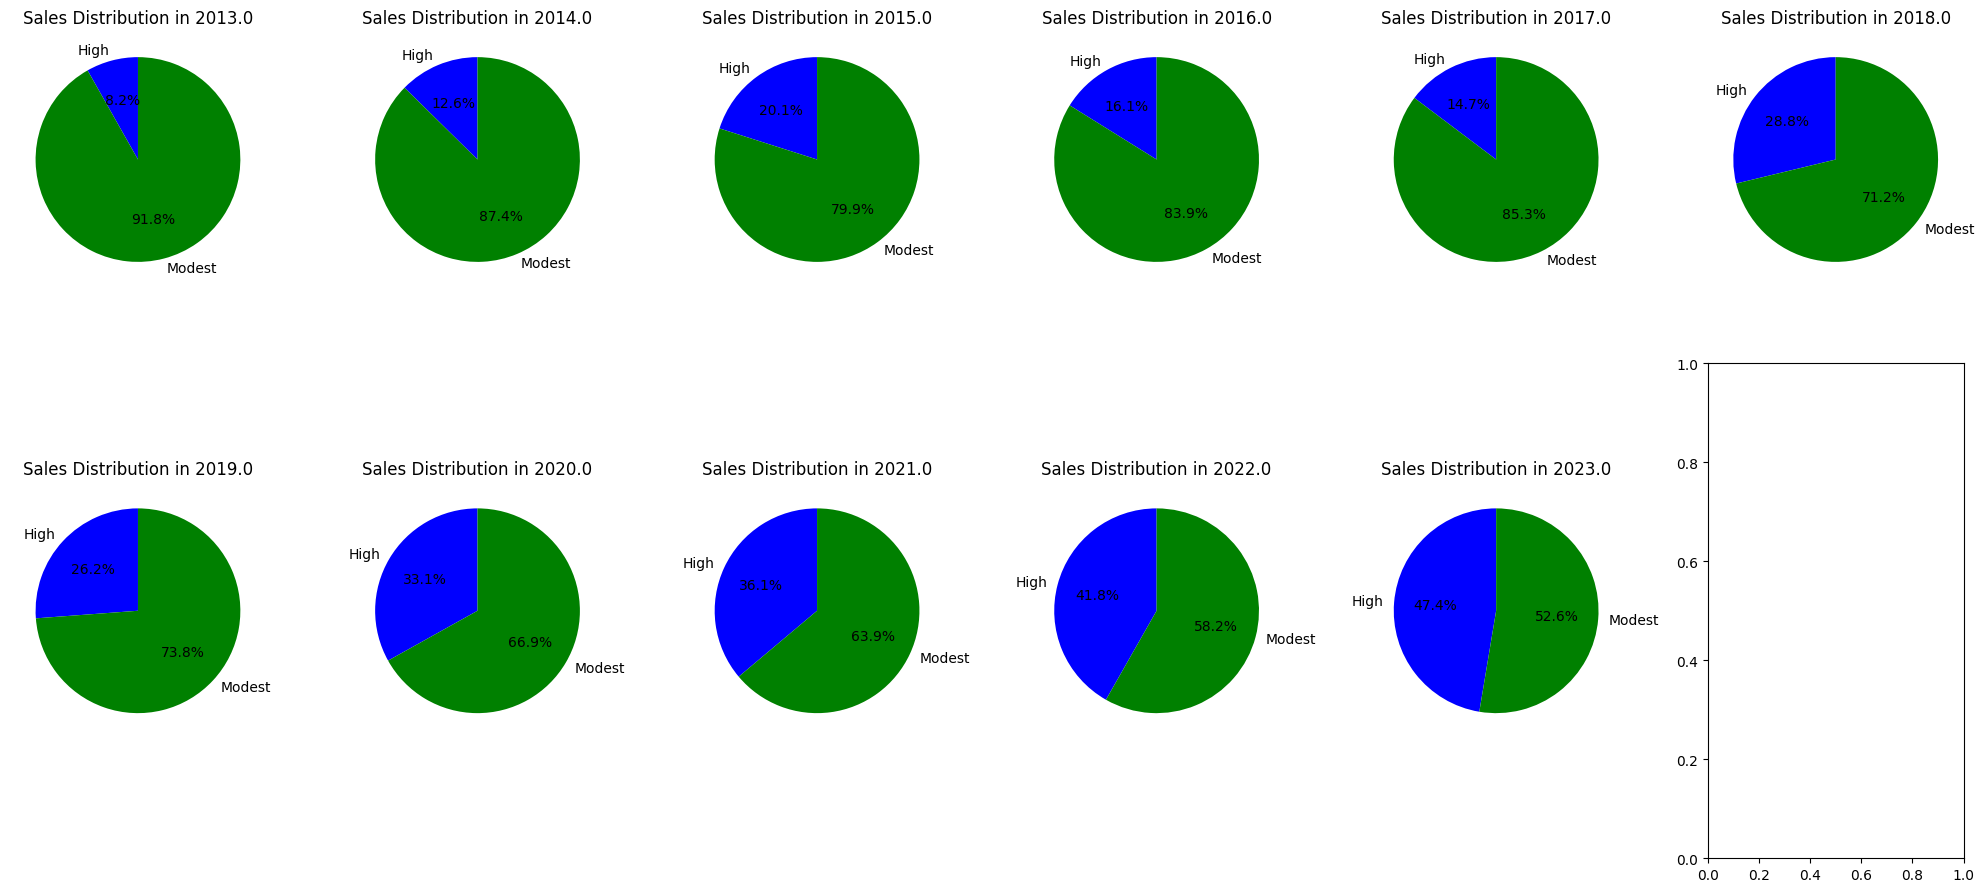

In [73]:
# List of unique years
years = annual_sales['release_year'].unique()

# Set up the plot
fig, axes = plt.subplots(nrows=2, ncols=len(years)//2 + len(years)%2, figsize=(20, 10))
axes = axes.flatten()

# Plot pie charts
for i, year in enumerate(years):
    data = annual_sales[annual_sales['release_year'] == year]
    axes[i].pie(data['avg_owners'], labels=data['price_category'], autopct='%1.1f%%', startangle=90, colors=['blue', 'green'])
    axes[i].set_title(f'Sales Distribution in {year}')

plt.tight_layout()
plt.show()


First of all, it should be noted that even if it is in the modest category, that does not strictly mean that it is in the independent game category. During the past decade and settling in the middle of the second half of the decade, free-to-play games captured the video game scene. Most of them were big-budget games. That is why the modest category starts off so strongly, first it rises by adding all the users in free-to-play games and then it feeds on independent games.

And that is why I understand the capture of the total annual sales of the games with higher prices, because certain free games would penetrate the market with such force that they would not leave room for other free games with those same characteristics. Opening the way for proposals of another nature such as those with a higher price.

**3. Sales (avg_owners) vs. Review Ratio by Price Category and Release Quarter**

This FacetPlot will show how the average owners and review ratio vary across different price categories and release quarters. The color coding by release quarter will add an additional layer of information, highlighting any seasonal trends in the data.



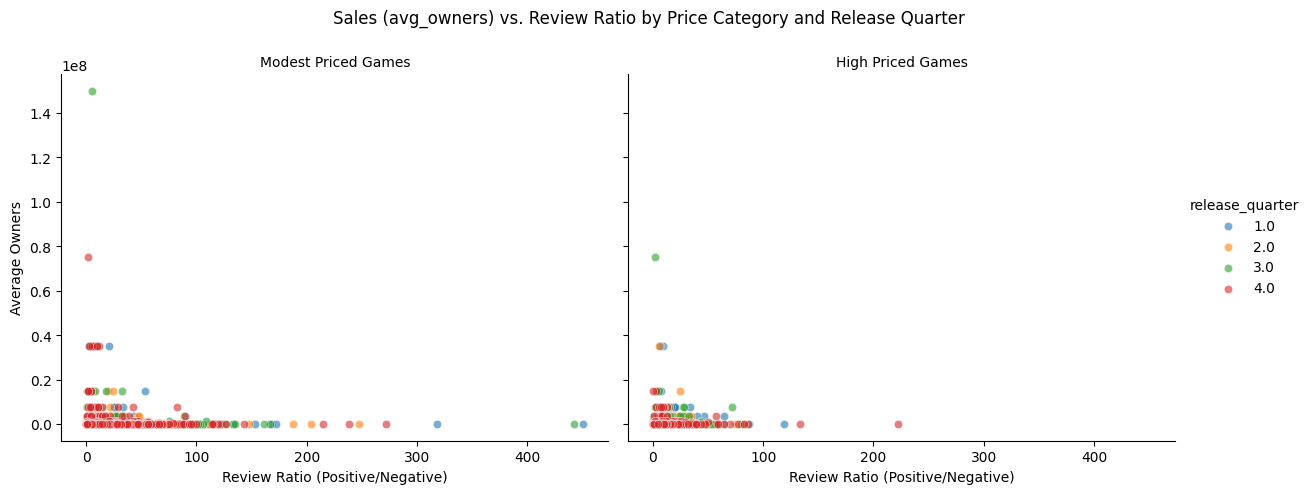

In [74]:
# Create a FacetGrid to compare avg_owners with review_ratio, colored by price_category and split by release_quarter
g = sb.FacetGrid(df, col="price_category", hue="release_quarter", height=5, aspect=1.2, palette="tab10")
g.map(sb.scatterplot, "review_ratio", "avg_owners", alpha=0.6, edgecolor="w").add_legend()

# Adding titles and labels
g.set_axis_labels("Review Ratio (Positive/Negative)", "Average Owners")
g.set_titles(col_template="{col_name} Priced Games")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Sales (avg_owners) vs. Review Ratio by Price Category and Release Quarter')

plt.show()

The overall trend suggests that review ratios are generally low across both price categories, indicating that the games in this dataset may not be overwhelmingly positive in terms of critical reception.

The modest priced games tend to achieve higher sales compared to high priced games, likely due to their affordability.

The release quarter does not appear to have a strong impact on the relationship between review ratio and sales, suggesting that the timing of release is less critical in influencing these variables.

These observations highlight the complex interplay between game price, sales performance, and critical acclaim, suggesting that affordability may play a significant role in driving sales, while critical acclaim does not necessarily correlate with higher sales figures.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I noticed a strong relationship between game length and sales. Games with shorter playtimes (less than 20 hours) tend to have higher sales, suggesting a preference among players for more concise experiences. This relationship implies that shorter games are more accessible and appealing to a broader audience. Interestingly, critically acclaimed games often fall into this shorter duration category, indicating that players value high-quality gameplay that doesn't require a long time commitment.

Throughout the year, the release of video games is quite consistent, with a noticeable peak towards the end of the year. This trend holds true for both high-priced and modestly priced games. However, the sales dynamics in the modestly priced category are particularly intriguing. This category initially gains strength from free-to-play games, which attract a large user base. Over time, it also includes a significant number of independent games, highlighting the continuous interest and steady sales in indie titles across all seasons. The dominance of free-to-play games in the market allows higher-priced games to maintain a strong presence by targeting different segments of players.

### Were there any interesting or surprising interactions between features?


One surprising finding was the weak correlation between critical acclaim and sales. Contrary to the assumption that critically acclaimed games would naturally sell more, the data showed otherwise. This suggests that factors other than critical reviews play a significant role in driving sales. Additionally, the popularity of games with extreme lengths (either very short or very long) varied widely, reflecting diverse player preferences.

The sales distribution within the modest category, which includes both free-to-play and independent games, revealed a fascinating pattern. Free-to-play games initially drive up the sales numbers due to their accessibility and large user base. This initial surge is followed by a steady interest in independent games throughout the year, demonstrating the ongoing appeal of indie titles regardless of the season.

## Conclusions

The distribution of game prices reveals a stark contrast between free or inexpensive games and those priced above $30. The rise of indie games has led to a significant number of cheaper titles, often monetized through in-game microtransactions rather than upfront costs. The impact of COVID-19 is noticeable, with a brief decline in game releases in 2022 followed by a recovery and ongoing post-COVID effects.

There were minimal data transformations needed, except for adjusting the release date plot. The most controversial aspect is the significant proportion of games with missing duration data, which remains useful through tags and categories.

Key observations include:

min_owners and max_owners: There is a strong logarithmic relationship, with clustering in specific ownership ranges.
Review Ratios: The distribution is skewed towards lower ratios, indicating many games receive moderate positive feedback. High ratios are associated with highly acclaimed games.
Popularity and Reviews: Games with higher ownership numbers generally receive better reviews.
Additional insights suggest:

Game Length: Shorter games often have higher sales, and critically acclaimed games are frequently shorter.
Release Trends: Game releases peak towards the end of the year, with free-to-play games significantly influencing sales patterns.
Surprisingly, critical acclaim does not strongly correlate with sales, indicating other factors also drive game success. The varying popularity of games with extreme playtimes reflects diverse player preferences. The combination of free-to-play games and indie titles ensures a robust market presence across different seasons.

In [75]:
df

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,name,release_date,price,positive,negative,app_id,min_owners,max_owners,hltb_single,categories,tags,release_year,avg_owners,log_min_owners,log_max_owners,review_ratio,release_month,release_quarter,price_category
0,Train Bandit,2017-10-12,0.99,53,5,655370,0,20000,NaN,"[Single-player, Steam Achievements, Full contr...","[Indie, Action, Pixel Graphics, 2D, Retro, Arc...",2017.0,100.0,-inf,9.903488,8.833333,10.0,4.0,Modest
1,Henosis™,2020-07-23,5.99,3,0,1355720,0,20000,NaN,"[Single-player, Full controller support]","[2D Platformer, Atmospheric, Surreal, Mystery,...",2020.0,100.0,-inf,9.903488,3.000000,7.0,3.0,Modest
2,Two Weeks in Painland,2020-02-03,0.00,50,8,1139950,0,20000,NaN,"[Single-player, Steam Achievements]","[Indie, Adventure, Nudity, Violent, Sexual Con...",2020.0,100.0,-inf,9.903488,5.555556,2.0,1.0,Modest
3,Wartune Reborn,2021-02-26,0.00,87,49,1469160,50000,100000,NaN,"[Single-player, Multi-player, MMO, PvP, Online...","[Turn-Based Combat, Massively Multiplayer, Mul...",2021.0,75000.0,10.819778,11.512925,1.740000,2.0,1.0,Modest
4,TD Worlds,2022-01-09,10.99,21,7,1659180,0,20000,NaN,"[Single-player, Steam Achievements, Steam Cloud]","[Tower Defense, Rogue-lite, RTS, Replay Value,...",2022.0,100.0,-inf,9.903488,2.625000,1.0,1.0,Modest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60947,Two Cubes,2023-08-14,0.99,54,0,2511290,0,20000,NaN,"[Multi-player, Co-op, Online Co-op, Steam Achi...","[Online Co-Op, Adventure, 2D Platformer, Puzzl...",2023.0,100.0,-inf,9.903488,54.000000,8.0,3.0,Modest
60948,Wisp Child,2023-10-20,14.99,5,0,2424000,0,20000,NaN,"[Single-player, Full controller support]","[Action, Adventure, Action-Adventure, Puzzle, ...",2023.0,100.0,-inf,9.903488,5.000000,10.0,4.0,Modest
60949,FireKrackers,2023-09-17,4.99,1,0,2237270,0,20000,NaN,"[Single-player, Tracked Controller Support, VR...","[VR, Arcade, Puzzle-Platformer, Action, Destru...",2023.0,100.0,-inf,9.903488,1.000000,9.0,3.0,Modest
60950,nekowater,2023-11-21,2.99,2,1,2650840,0,20000,NaN,"[Single-player, Steam Achievements, Remote Pla...","[Adventure, Cats, Cute, First-Person, Explorat...",2023.0,100.0,-inf,9.903488,1.000000,11.0,4.0,Modest
